In [43]:
import cv2 as cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Fourier_Transform_FFT_DFT.php

In [44]:
img = cv2.imread("EMeschkeGray.jpg", 0);
img_float32 = np.float32(img)

In [45]:
img_float32


array([[ 197.,  197.,  197., ...,  217.,  218.,  219.],
       [ 196.,  197.,  197., ...,  217.,  218.,  218.],
       [ 195.,  196.,  197., ...,  218.,  218.,  219.],
       ..., 
       [ 198.,  199.,  202., ...,  233.,  233.,  234.],
       [ 194.,  197.,  203., ...,  232.,  235.,  237.],
       [ 192.,  191.,  197., ...,  233.,  235.,  236.]], dtype=float32)

In [46]:
#cv2.imshow("Test", inputImage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

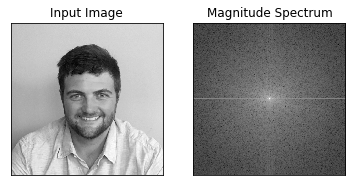

In [47]:

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
rows, cols = img.shape
crow, ccol = rows/2 , cols/2     # center

plt.show()


In [48]:
#b = magnitude_spectrum >138
#c = b.astype(int)
#magnitude_spectrum *= c

#b = dft_shift >100
#c = b.astype(int)
#dft_shift *= c

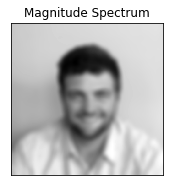

In [49]:
#Gaussian filter
filt = cv2.getGaussianKernel(rows/20, 10)
sampled = np.zeros((rows/20, rows/20, 1))
filteredOrig = cv2.sepFilter2D(img_float32, -1, filt, filt, sampled, (-1,-1))
plt.subplot(122),plt.imshow(filteredOrig, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

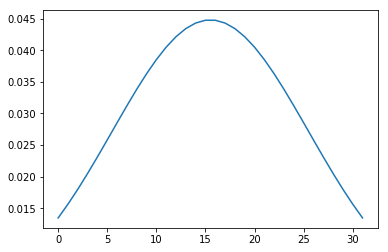

1024

In [50]:
plt.plot(filt)
plt.show()
sampled.size

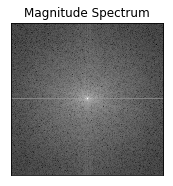

In [51]:
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [52]:
rows, cols = img.shape
crow, ccol = rows/2 , cols/2     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-20:crow+20, ccol-20:ccol+20] = 1
#mask[crow-10:crow+10, ccol-10:ccol+10] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

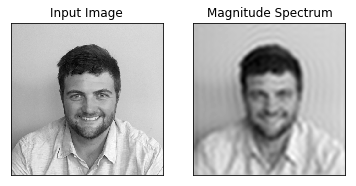

In [53]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show() 

In [94]:
mask[320:340,320:340,1]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,